In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
sys.path.append("../../")
from src.util import operators, debye_spectral_density
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val
from src.homps import homps
from src.hops import hops

In [4]:
b = np.diag(np.sqrt(np.arange(1, 4, dtype=complex)), 1)
print(b)

[[0.        +0.j 1.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 1.41421356+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 1.73205081+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]]


In [5]:
# parameters for the bath correlation functions
# gs = np.array([[0.01, 0.01, 0.01, 0.01], [0.1, 0.1, 0.1, 0.1], [1, 1, 1, 1], [10, 10, 10, 10], [100, 100, 100, 100]])
# w = np.array([0.5+2j, 0.5+2j, 0.5+2j, 0.5+2j])
N = 4
beta = 50.0
T = 1/beta
gamma = 1.0
eta = 0.5
g, w = debye_spectral_density.get_debye_coefficients(N, T, gamma, eta, mode='pade')

f = 1
Omega = 10
# time
duration = 2
# operators
N_cav = 2
w0 = 1
wc = 1
_, a_dagger, a, _ = operators.generate_auxiallary_operators(N_cav, True)

h = operators.generate_quantum_battery_hamiltonian(w0, wc, Omega, f, a, a_dagger)
L = np.kron(np.eye(2), a)
psi0 = np.zeros((2 * N_cav,), dtype=complex)
psi0[1] = 1
# Try:
# 1. Turn on the noise
# 2. Try exact computations

In [12]:
N_steps = 50
N_trunc = 8
use_noise = False

options_cbe = {
    'linear' : False,
    'use_noise' : use_noise,
    'method' : 'CBETDVP',
    'chi_max' : 20,
    'eps' : 1.e-15,
    'D_max' : 20,
    'D_tilde': 1,
    'truncation_threshold': 1e-14,
    'health_check_threshold': 1e-10,
    'enable_orthogonalization': True
}

options_2 = {
    'linear' : False,
    'use_noise' : use_noise,
    'method' : 'TDVP2',
    'chi_max' : 20,
    'eps' : 1.e-15
}

In [13]:
print("Calculating g = " + str(g[0]))
start_cbe = time.time()
my_homps_cbe = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options_cbe)
psis_cbe = my_homps_cbe.compute_realizations(1, psi0=psi0)
sigma_zs_cbe = compute_exp_val(psis_cbe, L)
end_cbe = time.time()
elapsed_time_cbe = end_cbe - start_cbe
print("Elapsed time: ", str(elapsed_time_cbe))

Without noise:
Calculating g = (0.5266331062533587-0.25j)
Using CBE-TDVP
Length:  5
1e-10
Steps: 0
Health check of preselected A: 1.17284639258489e-15
Steps: 1
Health check of preselected A: 4.982165616879025e-15
Health check of preselected A: 2.8313748239171495e-16
Steps: 2
Health check of preselected A: 9.737459587113797e-15
Health check of preselected A: 5.79553433516819e-16
Health check of preselected A: 2.0627328576204143e-17
Steps: 3
Health check of preselected A: 9.504952708155681e-15
Health check of preselected A: 8.953898529871832e-08
Health check of preselected A: 2.34499845052912e-14
Steps: 4
Health check of preselected A: 5.340361975014536e-10
Health check of preselected A: 1.2679253423627677e-08
Health check of preselected A: 7.76593449582732e-12
Steps: 5
Health check of preselected A: 9.821276476254249e-10
Health check of preselected A: 9.572600077311441e-08
Health check of preselected A: 1.7137319438864346e-11
Steps: 6
Health check of preselected A: 4.092116578157031e-09

In [7]:
print("Calculating g = " + str(g[0]))
start_2 = time.time()
my_homps_2 = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options_2)
psis_2 = my_homps_2.compute_realizations(1, psi0=psi0)
sigma_zs_2 = compute_exp_val(psis_2, L)
end_2 = time.time()
elapsed_time_2 = end_2 - start_2
print("Elapsed time: ", str(elapsed_time_2))

Calculating g = (0.5266331062533587-0.25j)
Using TDVP2
Length:  5
Steps: 0
Steps: 1
Steps: 2
Steps: 3
Steps: 4
Steps: 5
Steps: 6
Steps: 7
Steps: 8
Steps: 9
Steps: 10
Steps: 11
Steps: 12
Steps: 13
Steps: 14
Steps: 15
Steps: 16
Steps: 17
Steps: 18
Steps: 19
Steps: 20
Steps: 21
Steps: 22
Steps: 23
Steps: 24
Steps: 25
Steps: 26
Steps: 27
Steps: 28
Steps: 29
Steps: 30
Steps: 31
Steps: 32
Steps: 33
Steps: 34
Steps: 35
Steps: 36
Steps: 37
Steps: 38
Steps: 39
Steps: 40
Steps: 41
Steps: 42
Steps: 43
Steps: 44
Steps: 45
Steps: 46
Steps: 47
Steps: 48
Elapsed time:  4.597456216812134


gamma/Omega: 0.1


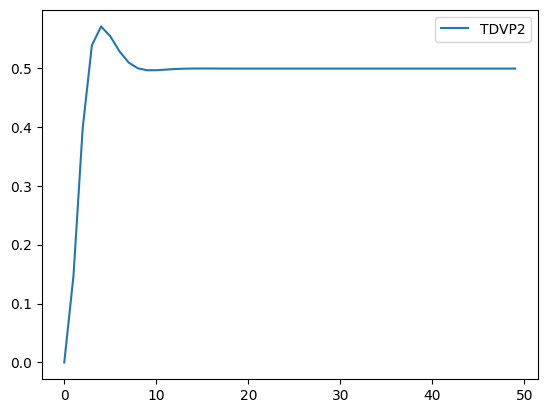

In [11]:
c2_tdvp2 = psis_2[0,:,2]
abs_c2_tdvp2 = np.abs(c2_tdvp2)
dE_tdvp2 = w0 * np.power(abs_c2_tdvp2, 2)

# c2_cbetdvp = psis_cbe[0,:,2]
# abs_c2_cbetdvp = np.abs(c2_cbetdvp)
# dE_cbetdvp = w0 * np.power(abs_c2_cbetdvp, 2)
# print(c2_cbetdvp)
print(f"gamma/Omega: {gamma/Omega}")
# plt.plot(np.arange(0,N_steps), dE_cbetdvp, "-", label="CBE-TDVP")
plt.plot(np.arange(0,N_steps), dE_tdvp2, "-", label="TDVP2")
plt.legend()

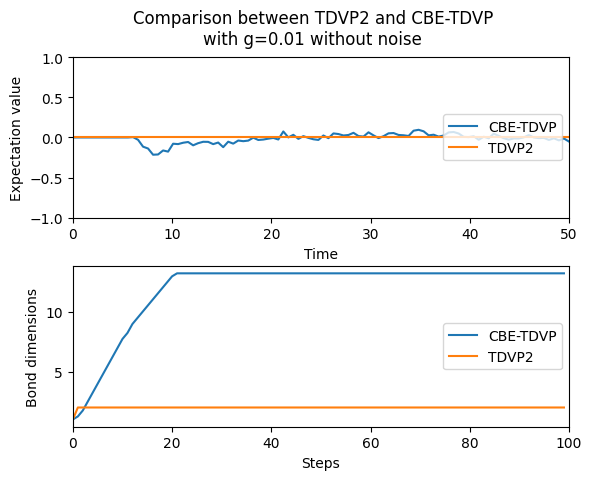

In [41]:
fig, axs = plt.subplots(2)

axs[0].plot(np.linspace(0, duration, N_steps), sigma_zs_cbe, "-", label="CBE-TDVP")
axs[1].plot(range(0, N_steps), my_homps_cbe.average_bond_dimensions, "-", label="CBE-TDVP")
axs[0].plot(np.linspace(0, duration, N_steps), sigma_zs_2, "-", label="TDVP2")
axs[1].plot(range(0, N_steps), my_homps_2.average_bond_dimensions, "-", label="TDVP2")
axs[0].legend(loc="center right")
axs[1].legend(loc="center right")
axs[0].set_ylim(-1, 1)
axs[0].set_xlim(0, duration)    
axs[1].set_xlim(0, N_steps)
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Expectation value")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Bond dimensions")
noise_title = "with noise" if use_noise else "without noise"
fig.suptitle(f'Comparison between TDVP2 and CBE-TDVP\nwith g={g[0]} {noise_title}') 
fig.subplots_adjust(hspace=0.3)

In [20]:
import os
noise_prefix = "noise" if use_noise else "no-noise"
prefix = f"../../output/{str(g[0])}/{noise_prefix}/"
os.makedirs(prefix, exist_ok=True)
g_param = "g=" + str(g[0]).replace('.', ',')
name_2 = "tdvp2_"
name_cbe = "cbetdvp_"
psi_name = "psi"
dim_name = "avg_bond_dim"

np.save(prefix + name_2 + psi_name, psis_2)
np.save(prefix + name_cbe + psi_name, psis_cbe)
np.save(prefix + name_2 + dim_name, my_homps_2.average_bond_dimensions)
np.save(prefix + name_cbe + dim_name, my_homps_cbe.average_bond_dimensions)
fig.savefig(prefix + "plot")

import json
with open('../../output/output.json', 'r', encoding='utf-8') as f:
    content = f.read()
    if content == '':
        data = {}
    else:
        data = json.loads(content)

data[g_param][noise_prefix] = {
    "tdvp2_time": "{:.2f}".format(elapsed_time_2),
    "cbetdvp_time": "{:.2f}".format(elapsed_time_cbe),
    "path": str(g[0])
}

with open('../../output/output.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, indent=4)

# with open("../output/" + name_2, 'wb') as f:
#     np.save(f, psis_2)
# with open("../output/" + name_cbe, 'wb') as f:
#     np.save(f, psis_cbe)


In [ ]:

# print("With noise:")
# options['use_noise'] = True
# for i, g in enumerate(gs):
#     print("Calculating g = " + str(g[0]))
#     my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
#     for i in range(3):
#         psis = my_homps.compute_realizations(1)
#         sigma_zs = compute_exp_val(psis, sigma_z)
#         plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="g="+str(g[0]))

# plt.legend()
# plt.ylim(-1, 1)
# plt.xlim(0, duration)
# plt.show()
# TODO:
# 1. Plot the bond dimension increase
# 2. Try g=10 and g=100 until convergence (put in different sections)
# 3. Try the non-linear case
# 4. Increase chi_max (20)